In [3]:
#EXERCISE 1.1 

import pandas as pd
from io import StringIO

csv_data = '''A,B,C,D
1.0,,3.0,4.0
5.0,6.0,,8.0
,11.0,12.0,'''
df = pd.read_csv(StringIO(csv_data))
print(df)
print(df.isnull().sum())

# C and D each have 1 missing value.



     A     B     C    D
0  1.0   NaN   3.0  4.0
1  5.0   6.0   NaN  8.0
2  NaN  11.0  12.0  NaN
A    1
B    1
C    1
D    1
dtype: int64


In [4]:
#EXERCISE 1.2

import pandas as pd
from io import StringIO

# Original dataset with missing values
csv_data = '''A,B,C,D
1.0,,3.0,4.0
5.0,6.0,,8.0
,11.0,12.0,'''
df = pd.read_csv(StringIO(csv_data))
print("Original DataFrame:")
print(df)
print("\nMissing values per column:")
print(df.isnull().sum())

# Drop rows with any missing values
print("\nDrop rows with any missing values:")
print(df.dropna(axis=0))

# Drop columns with any missing values
print("\nDrop columns with any missing values:")
print(df.dropna(axis=1))

# Drop rows where all values are missing (none in this case)
print("\nDrop rows where all values are missing:")
print(df.dropna(how='all'))

# Drop rows with fewer than 4 non-missing values
print("\nDrop rows with fewer than 4 non-missing values:")
print(df.dropna(thresh=4))

# Drop rows where 'C' is missing
print("\nDrop rows where column 'C' is missing:")
print(df.dropna(subset=['C']))

# Drop rows where either 'A' or 'D' is missing
print("\nDrop rows where 'A' or 'D' is missing:")
print(df.dropna(subset=['A', 'D']))

Original DataFrame:
     A     B     C    D
0  1.0   NaN   3.0  4.0
1  5.0   6.0   NaN  8.0
2  NaN  11.0  12.0  NaN

Missing values per column:
A    1
B    1
C    1
D    1
dtype: int64

Drop rows with any missing values:
Empty DataFrame
Columns: [A, B, C, D]
Index: []

Drop columns with any missing values:
Empty DataFrame
Columns: []
Index: [0, 1, 2]

Drop rows where all values are missing:
     A     B     C    D
0  1.0   NaN   3.0  4.0
1  5.0   6.0   NaN  8.0
2  NaN  11.0  12.0  NaN

Drop rows with fewer than 4 non-missing values:
Empty DataFrame
Columns: [A, B, C, D]
Index: []

Drop rows where column 'C' is missing:
     A     B     C    D
0  1.0   NaN   3.0  4.0
2  NaN  11.0  12.0  NaN

Drop rows where 'A' or 'D' is missing:
     A    B    C    D
0  1.0  NaN  3.0  4.0
1  5.0  6.0  NaN  8.0


In [ ]:
#EXERCISE 1.3

import pandas as pd
import numpy as np
from io import StringIO
from sklearn.impute import SimpleImputer

# Sample data with missing values
csv_data = '''A,B,C,D
1.0,,3.0,4.0
5.0,6.0,,8.0
,11.0,12.0,'''
df = pd.read_csv(StringIO(csv_data))
print("Original DataFrame:")
print(df)

# Impute using 'mean'
imr_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_mean = imr_mean.fit_transform(df)
print("\nImputed with mean:")
print(imputed_mean)

# Impute using 'median'
imr_median = SimpleImputer(missing_values=np.nan, strategy='median')
imputed_median = imr_median.fit_transform(df)
print("\nImputed with median:")
print(imputed_median)

# Impute using 'most_frequent'
imr_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputed_freq = imr_freq.fit_transform(df)
print("\nImputed with most_frequent:")
print(imputed_freq)

# Why might 'most_frequent' be useful for categorical data?:

# 'most_frequent' is useful for categorical data because it replaces missing values with the most common category,
#  preserving the mode of the distribution and maintaining the integrity of categorical variables.

Original DataFrame:
     A     B     C    D
0  1.0   NaN   3.0  4.0
1  5.0   6.0   NaN  8.0
2  NaN  11.0  12.0  NaN

Imputed with mean:
[[ 1.   8.5  3.   4. ]
 [ 5.   6.   7.5  8. ]
 [ 3.  11.  12.   6. ]]

Imputed with median:
[[ 1.   8.5  3.   4. ]
 [ 5.   6.   7.5  8. ]
 [ 3.  11.  12.   6. ]]

Imputed with most_frequent:
[[ 1.  6.  3.  4.]
 [ 5.  6.  3.  8.]
 [ 1. 11. 12.  4.]]


In [7]:
#EXERCISE  2.1

import pandas as pd

# Updated DataFrame with an additional 'S' size
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class2'],
    ['red', 'L', 13.5, 'class1'],
    ['blue', 'XL', 15.3, 'class2'],
    ['yellow', 'S', 9.5, 'class1']
])
df.columns = ['color', 'size', 'price', 'classlabel']

# Updated size mapping including 'S'
size_mapping = {'S': 0, 'M': 1, 'L': 2, 'XL': 3}
df['size'] = df['size'].map(size_mapping)
print("Mapped ordinal sizes:")
print(df)

# Inverse mapping to recover original size labels
inv_size_mapping = {v: k for k, v in size_mapping.items()}
print("\nInverse mapping of sizes:")
print(df['size'].map(inv_size_mapping))



Mapped ordinal sizes:
    color  size  price classlabel
0   green     1   10.1     class2
1     red     2   13.5     class1
2    blue     3   15.3     class2
3  yellow     0    9.5     class1

Inverse mapping of sizes:
0     M
1     L
2    XL
3     S
Name: size, dtype: object


In [12]:
#EXERCISE  2.2

from sklearn.linear_model import LogisticRegression
import pandas as pd

# Sample DataFrame
df = pd.DataFrame([
    ['green', 'M', 10.1, {'label': 'class2'}], 
    ['red', 'L', 13.5, {'label': 'class1'}],
    ['blue', 'XL', 15.3, {'label': 'class2'}],
    ['yellow', 'S', 9.5, {'label': 'class1'}]
])
df.columns = ['color', 'size', 'price', 'classlabel']

# Ordinal encoding
size_mapping = {'S': 0, 'M': 1, 'L': 2, 'XL': 3}
df['size'] = df['size'].map(size_mapping)

# Features and target
X = df[['size', 'price']]
y = df['classlabel'] 

# Try fitting classifier
model = LogisticRegression()
try:
    model.fit(X, y)
except ValueError as e:
    print(" Error triggered:")
    print(e)

 Error triggered:
Unknown label type: unknown. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


In [13]:
#EXERCISE  2.3

import pandas as pd

# Original DataFrame
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class2'],
    ['red', 'L', 13.5, 'class1'],
    ['blue', 'XL', 15.3, 'class2'],
    ['yellow', 'S', 9.5, 'class1']
])
df.columns = ['color', 'size', 'price', 'classlabel']

# Ordinal encoding for 'size'
size_mapping = {'S': 0, 'M': 1, 'L': 2, 'XL': 3}
df['size'] = df['size'].map(size_mapping)

# One-hot encode nominal features: 'color' and 'classlabel'
df_encoded = pd.get_dummies(df, columns=['color', 'classlabel'], drop_first=True)

print(" One-hot encoded DataFrame:")
print(df_encoded)

 One-hot encoded DataFrame:
   size  price  color_green  color_red  color_yellow  classlabel_class2
0     1   10.1         True      False         False               True
1     2   13.5        False       True         False              False
2     3   15.3        False      False         False               True
3     0    9.5        False      False          True              False


In [ ]:
#EXERCISE 2.3

import pandas as pd

# Original DataFrame
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class2'],
    ['red', 'L', 13.5, 'class1'],
    ['blue', 'XL', 15.3, 'class2'],
    ['yellow', 'S', 9.5, 'class1']
])
df.columns = ['color', 'size', 'price', 'classlabel']

# Ordinal encoding for 'size'
size_mapping = {'S': 0, 'M': 1, 'L': 2, 'XL': 3}
df['size'] = df['size'].map(size_mapping)

# One-hot encode nominal features: 'color' and 'classlabel'
df_encoded = pd.get_dummies(df, columns=['color', 'classlabel'], drop_first=True)

print("One-hot encoded DataFrame:")
print(df_encoded)

# If you encode 4 categories into 4 binary columns, they sum to 1 for each row.
# This creates redundancy and confuses models like linear regression or logistic regression.
# Solution: Drop one column per category using drop_first=True. This avoids the "dummy variable trap" and keeps the model stable.


One-hot encoded DataFrame:
   size  price  color_green  color_red  color_yellow  classlabel_class2
0     1   10.1         True      False         False               True
1     2   13.5        False       True         False              False
2     3   15.3        False      False         False               True
3     0    9.5        False      False          True              False


In [15]:
#EXERCISE  3.1

import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# Load dataset
df_wine = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
    header=None
)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

# Features and target
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

# Split with test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

# Check class proportions
print("🔍 Class proportions in y_train:")
print(np.bincount(y_train) / len(y_train))

print("\n🔍 Class proportions in y_test:")
print(np.bincount(y_test) / len(y_test))

# Using stratify=y ensures that each class is proportionally represented in both sets 
# preserving the original distribution and making your evaluation more reliable.


🔍 Class proportions in y_train:
[0.         0.33098592 0.40140845 0.26760563]

🔍 Class proportions in y_test:
[0.         0.33333333 0.38888889 0.27777778]


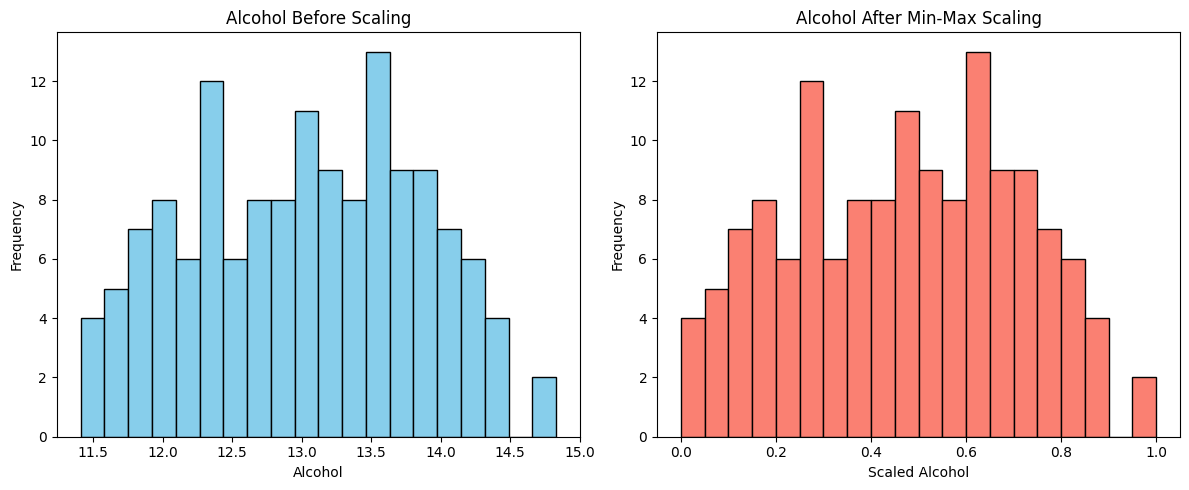

In [ ]:
#EXERCISE 4.1

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load wine dataset
df_wine = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
    header=None
)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

# Split features and target
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

# Min-Max Scaling
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

# Plot histograms for the Alcohol feature (index 0)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(X_train[:, 0], bins=20, color='skyblue', edgecolor='black')
plt.title('Alcohol Before Scaling')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(X_train_norm[:, 0], bins=20, color='salmon', edgecolor='black')
plt.title('Alcohol After Min-Max Scaling')
plt.xlabel('Scaled Alcohol')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [18]:
#EXERCISE 4.2

from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardize features
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# Print first two rows
print("First two standardized rows:\n", X_train_std[:2])

# Compare mean and std across features
print("\nFeature-wise mean:")
print(np.round(X_train_std.mean(axis=0), decimals=4))

print("\nFeature-wise std deviation:")
print(np.round(X_train_std.std(axis=0), decimals=4))

# We use standardization when your data has varying distributions, outliers, or when your model assumes normally distributed features.
# We use normalization when you need bounded inputs or when your data is already fairly uniform and outlier-free.


First two standardized rows:
 [[-1.45083563 -1.27985582  0.74306024 -0.49136511 -0.37078043 -0.15558334
   0.17965734 -1.20822065  1.29150989 -0.84486398 -0.74910758  0.66674895
  -0.71247369]
 [ 1.34746381 -0.75756493 -0.2118226  -0.84257574 -0.29683265 -0.15558334
   0.39838279 -0.87620839 -0.0490171  -0.00656951  0.99652401  0.29506888
   1.63245344]]

Feature-wise mean:
[-0. -0. -0.  0. -0. -0.  0. -0. -0.  0.  0.  0.  0.]

Feature-wise std deviation:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


C:\Users\TSHIFHIWA AUSTIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
C:\Users\TSHIFHIWA AUSTIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
C:\Users\TSHIFHIWA AUSTIN\AppData\Local\

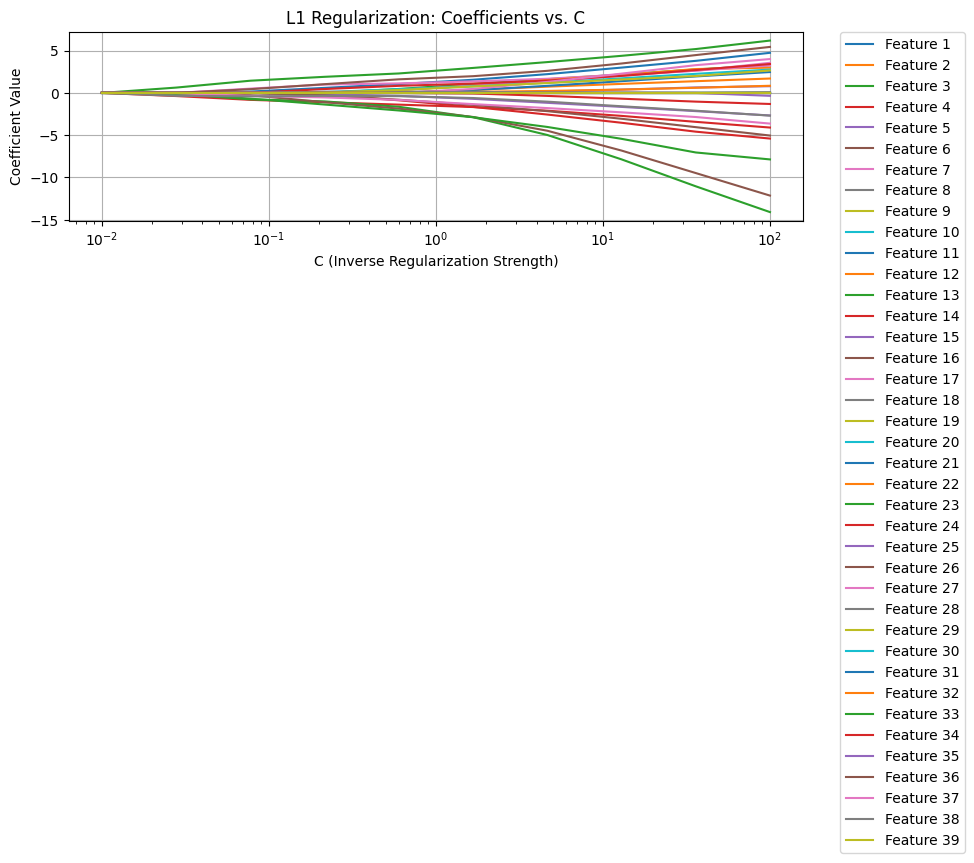

In [20]:
#EXERCISE 5.1

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Define a range of C values (inverse of regularization strength)
C_values = np.logspace(-2, 2, 10)  
weights = []

# Train logistic regression with L1 penalty for each C
for C in C_values:
    lr = LogisticRegression(penalty='l1', C=C, solver='liblinear')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_.flatten())  

# Convert weights to NumPy array for plotting
weights = np.array(weights)


plt.figure(figsize=(10, 6))
for i in range(weights.shape[1]):
    plt.plot(C_values, weights[:, i], label=f'Feature {i+1}')

plt.xscale('log')
plt.xlabel('C (Inverse Regularization Strength)')
plt.ylabel('Coefficient Value')
plt.title('L1 Regularization: Coefficients vs. C')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.grid(True)
plt.show()

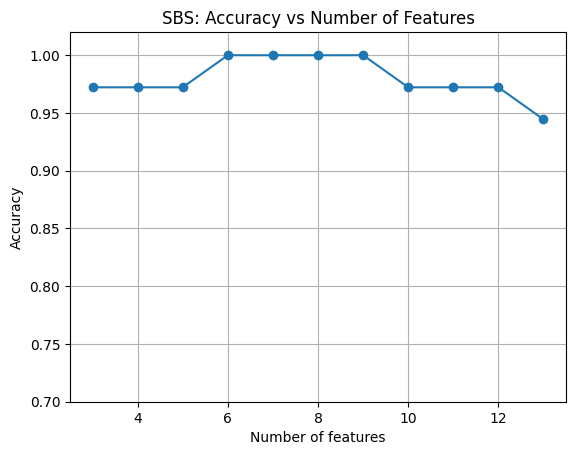

Selected features: Index(['Alcohol', 'Flavanoids', 'Proanthocyanins'], dtype='object')
Test accuracy with 3 features: 0.9166666666666666


In [21]:
#EXERCISE 5.2 

from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# SBS class definition
class SBS:
    def __init__(self, estimator, k_features, scoring=None, test_size=0.25, random_state=1):
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.scoring = scoring
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=self.test_size, random_state=self.random_state
        )

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        self.scores_ = []

        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_.append(score)

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            self.scores_.append(scores[best])
            dim -= 1

        self.k_score_ = self.scores_[-1]
        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        return self.estimator.score(X_test[:, indices], y_test)

# Instantiate and run SBS
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=3)
sbs.fit(X_train_std, y_train)

# Plot accuracy vs number of features
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.title('SBS: Accuracy vs Number of Features')
plt.show()

# Selected features at k=3
k3 = list(sbs.subsets_[-1])
print("Selected features:", df_wine.columns[1:][k3])

knn.fit(X_train_std[:, k3], y_train)
print('Test accuracy with 3 features:', knn.score(X_test_std[:, k3], y_test))

 1) Proline                        0.188217
 2) Flavanoids                     0.151884
 3) Color intensity                0.150182
 4) Alcohol                        0.137097
 5) OD280/OD315 of diluted wines   0.126218
 6) Hue                            0.062428
 7) Total phenols                  0.051911
 8) Malic acid                     0.031839
 9) Magnesium                      0.028725
10) Alcalinity of ash              0.025410
11) Proanthocyanins                0.018676
12) Ash                            0.014667
13) Nonflavanoid phenols           0.012745


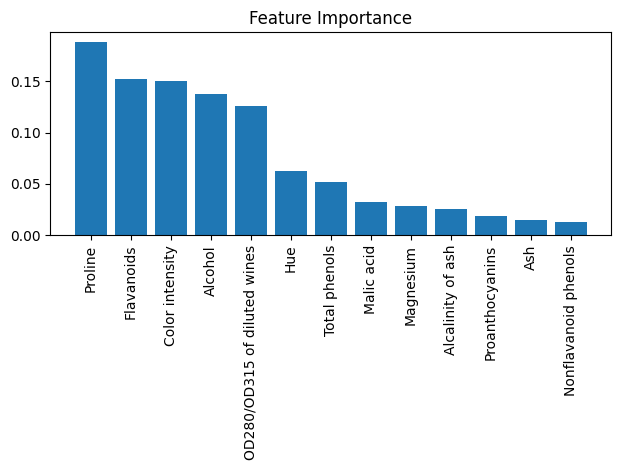

Test accuracy with RF-selected features: 0.5277777777777778

Top features from RF: ['Alcohol', 'Flavanoids', 'Color intensity', 'OD280/OD315 of diluted wines', 'Proline']
Top features from SBS: ['Alcohol', 'Flavanoids', 'Proanthocyanins']


In [ ]:
#EXERCISE 5.3

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

# Feature labels
feat_labels = df_wine.columns[1:]

# Train Random Forest
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)

# Feature importances
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Print ranked features
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

# Plot feature importances
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

# Select features with importance >= 0.1
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

# Train KNN on selected features
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_selected, y_train)
print('Test accuracy with RF-selected features:', knn.score(X_test_selected, y_test))

# Compare top RF features with SBS
rf_top_features = feat_labels[importances >= 0.1]
sbs_top_features = df_wine.columns[1:][list(sbs.subsets_[-1])]
print("\nTop features from RF:", list(rf_top_features))
print("Top features from SBS:", list(sbs_top_features))


# Questions:

# 1.Handling missing data prevents bias and model errors
# 2.Use one-hot for nominal data, label encoding for ordinal; scaling is vital for KNN/SVM accuracy
# 3.L1 regularization is fast and embedded
# 4.SBS is slower but model-agnostic
